В данной задаче есть два класса картинок: X - обычная еда, Y - еда из различных аниме.

Соответственно, генераторы в cycleGAN учились генерить из X множества множество Y и наоборот

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import PIL
import random
import os
%matplotlib inline

In [2]:
# !unzip -q drive/My\ Drive/CycleGan/real_food.zip

In [3]:
# !unzip -q drive/My\ Drive/CycleGan/anime_food.zip

Подготовим dataloader и transforms для наших данных

In [4]:
from dataloader import get_dataloader
from utils import set_seed

set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

real_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

fake_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

REALS_PATH = 'real_food' 
FAKES_PATH = 'anime_food'

train_dataloader = get_dataloader(REALS_PATH, FAKES_PATH, real_transforms, fake_transforms, batch_size=4)

Теперь запустим обучение нашей модели

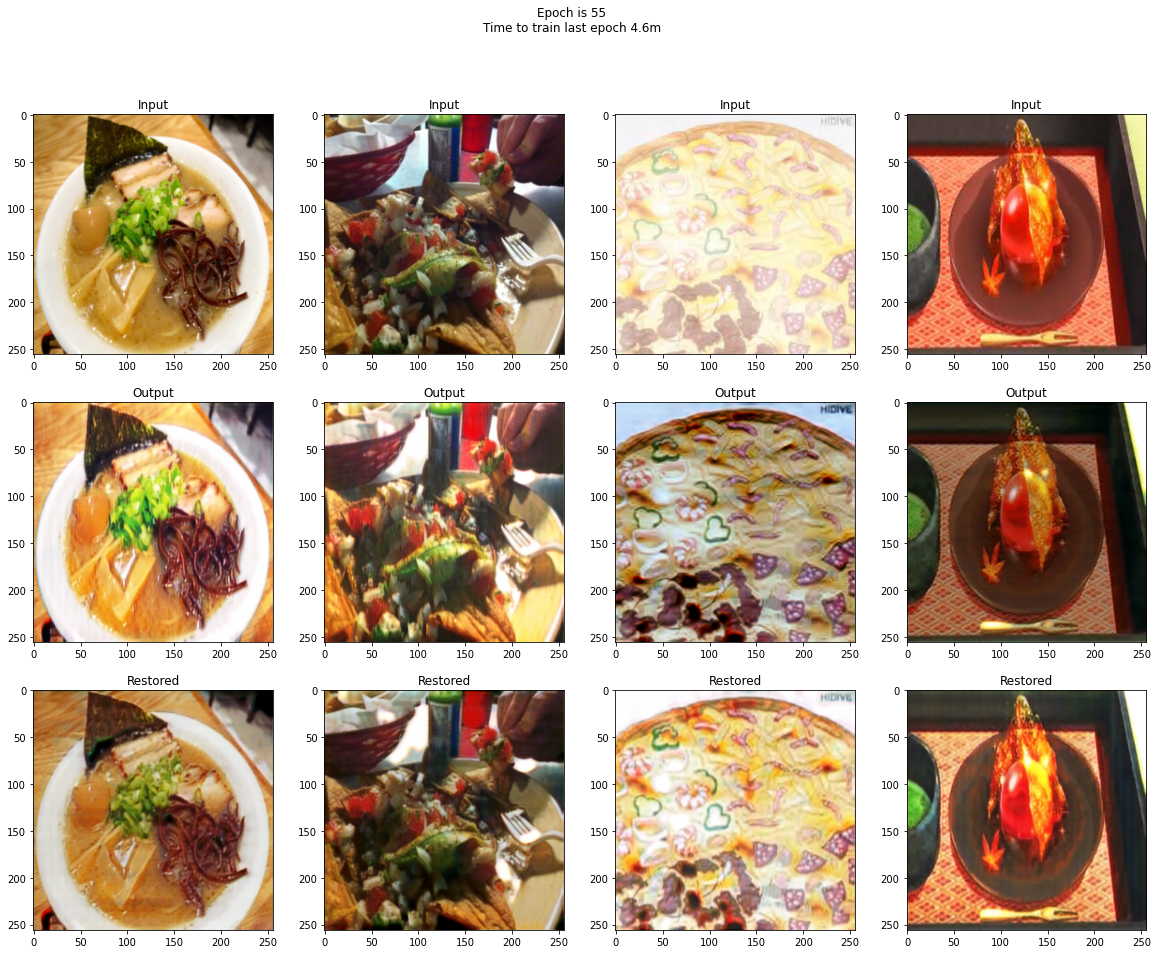

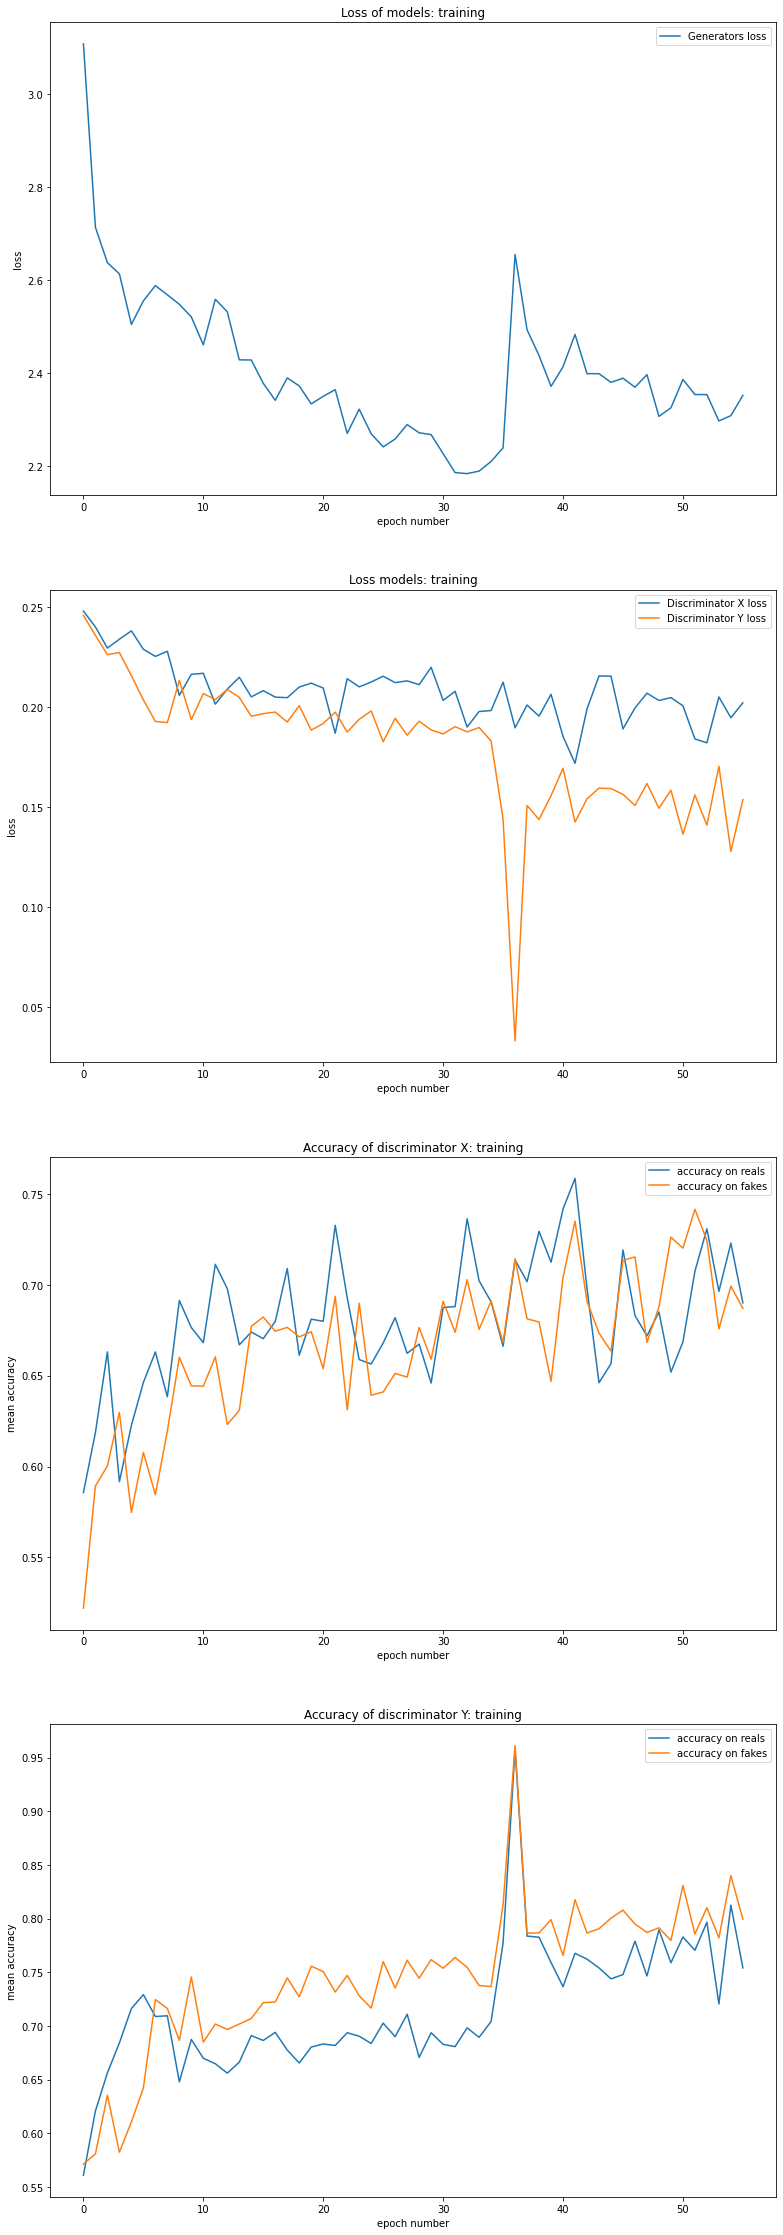

KeyboardInterrupt: ignored

In [9]:
from model import Generator, Discriminator, train_cycle_model

path_to_save = 'trained_models/best_model_.pt'
epoch_num = 100

train_cycle_model(Generator, Discriminator, train_dataloader, [1, 2, 4], epoch_num, path_to_save, device)

Посмотрим на пару примеров работы модели

Сначала загрузим веса модели с dropbox

In [ ]:
!wget https://www.dropbox.com/sh/y5jwpdnuso8vcwa/AAA30MruUCoM3XG89QccvwD8a?dl=0 -O trained_models.zip

In [ ]:
!unzip trained_models -d trained_models

In [1]:
from model import test_one_sample

path = 'trained_models/best_model.pt'
test_one_sample(Generator, 'x2y', path, 'images/141056.jpg', device)

![title](images/example_1.png)

![title](images/example.png)

Чтобы посмотреть на графики истории обучения модели, можно воспользоваться функцией show_history

In [5]:
from model import show_history

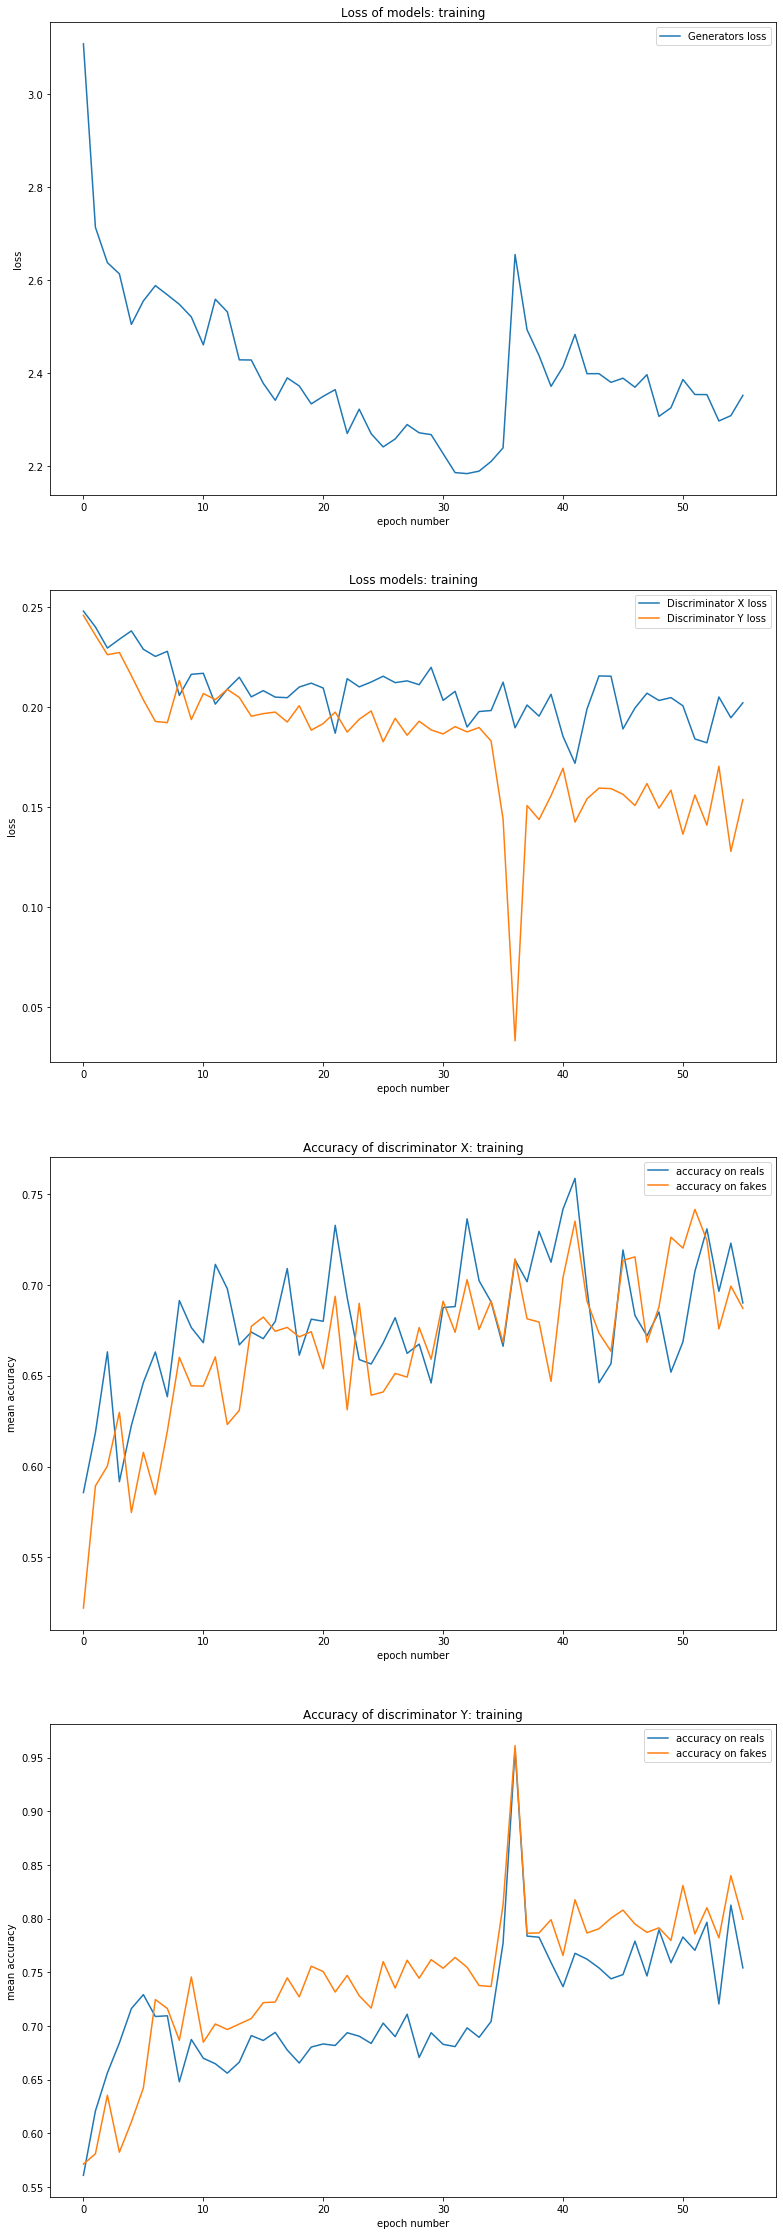

In [6]:
path = 'trained_models/best_model.pt'
show_history(path, device)